In [1]:
import numpy as np
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.feature_extraction import DictVectorizer

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [3]:
!curl $url -o data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1390k  100 1390k    0     0  2118k      0 --:--:-- --:--:-- --:--:-- 2125k


In [65]:
data = pd.read_csv("data.csv")

In [66]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [69]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [70]:
data.describe(include="object")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [76]:
def preprocess(df, fillzeros, fillmean, fillmedian):
    df = df.copy()
    for column in fillzeros:
        df[column] = df[column].fillna(0)    
    for column in fillmean:
        df[column] = df[column].fillna(df[column].mean())
    for column in fillmedian:
        df[column] = df[column].fillna(df[column].median())
    return df

<AxesSubplot: >

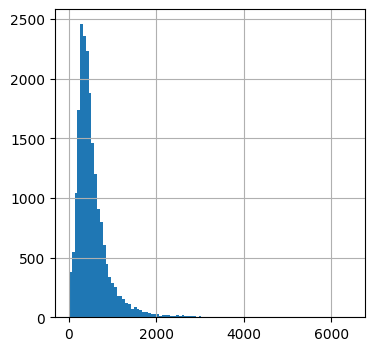

In [85]:
dp.total_bedrooms.hist(bins=100, figsize=(4,4))

In [78]:
data_processed = preprocess(data, [], [], ['total_bedrooms'])

In [79]:
data_processed['rooms_per_household'] = data_processed['total_rooms'] / data_processed ['households']
data_processed['bedrooms_per_room'] = data_processed['total_bedrooms'] / data_processed ['total_rooms']
data_processed['population_per_household'] = data_processed['population'] / data_processed ['households']

In [80]:
data_processed['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [53]:
dp.total_bedrooms.mean()

537.8705525375618

In [51]:
dp.total_bedrooms.median()

435.0

In [14]:
data_processed['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [15]:
data_processed.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

corr() will use  float, int or boolean, so ocean_proximity is not used.

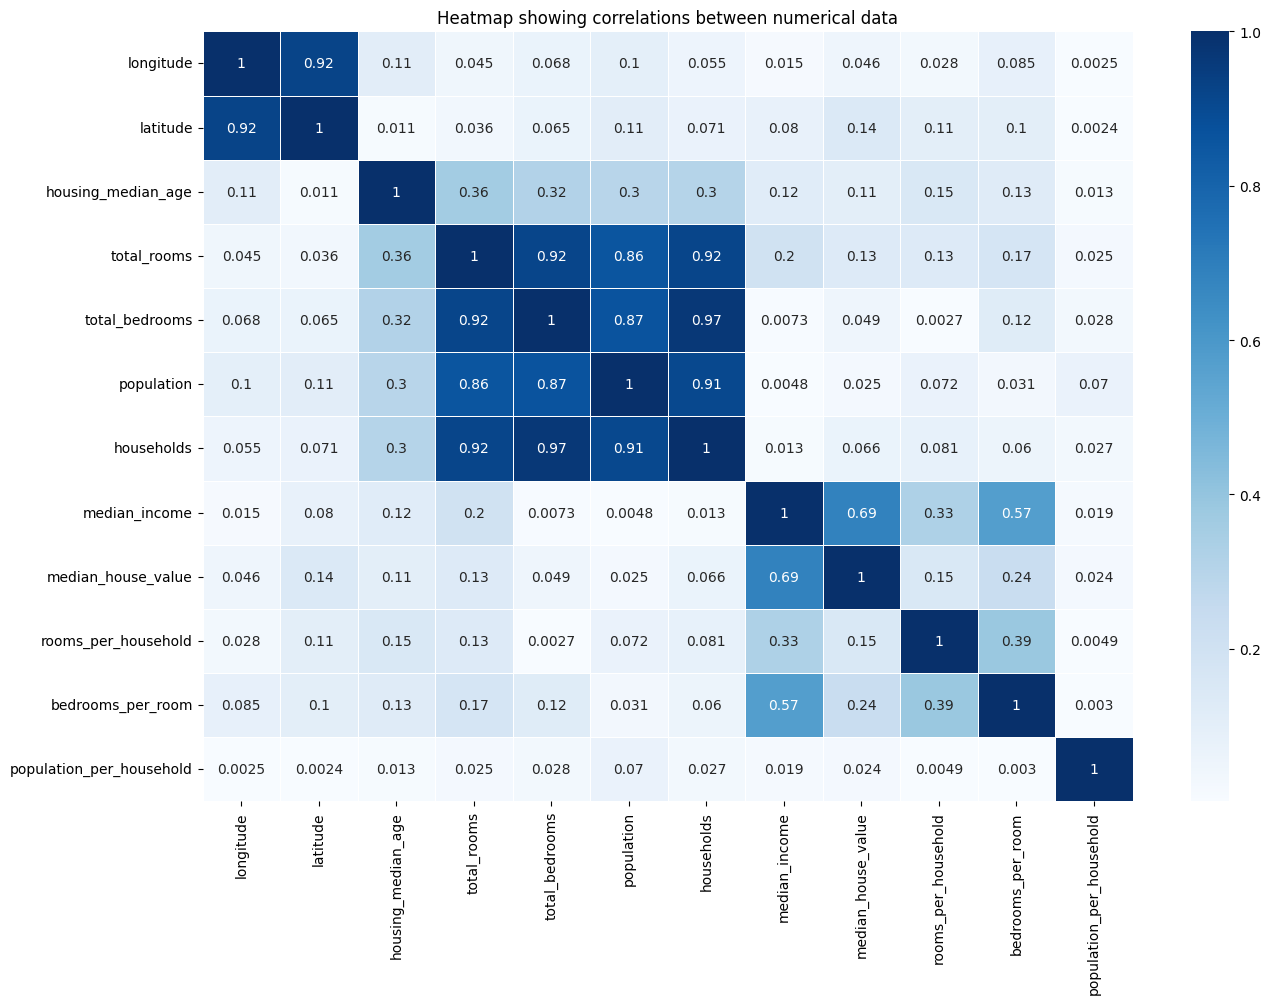

In [16]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_processed.corr().abs(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [17]:
data_processed.corr().abs()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,0.924664,0.108197,0.044568,0.068082,0.099773,0.055310,0.015176,0.045967,0.027540,0.084836,0.002476
latitude,0.924664,1.000000,0.011173,0.036100,0.065318,0.108785,0.071035,0.079809,0.144160,0.106389,0.104112,0.002366
housing_median_age,0.108197,0.011173,1.000000,0.361262,0.317063,0.296244,0.302916,0.119034,0.105623,0.153277,0.125396,0.013191
total_rooms,0.044568,0.036100,0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,0.174583,0.024581
total_bedrooms,0.068082,0.065318,0.317063,0.920196,1.000000,0.866266,0.966507,0.007295,0.049148,0.002717,0.122205,0.028019
population,0.099773,0.108785,0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,0.024650,0.072213,0.031397,0.069863
households,0.055310,0.071035,0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,0.080598,0.059818,0.027309
median_income,0.015176,0.079809,0.119034,0.198050,0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,0.573836,0.018766
median_house_value,0.045967,0.144160,0.105623,0.134153,0.049148,0.024650,0.065843,0.688075,1.000000,0.151948,0.238759,0.023737
rooms_per_household,0.027540,0.106389,0.153277,0.133798,0.002717,0.072213,0.080598,0.326895,0.151948,1.000000,0.387465,0.004852


Unstack will return a series, with index (multiple) with tuples from columns/index of original df

In [18]:
data_processed.corr().abs().unstack().sort_values(ascending=False)[0:30]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.966507
households                total_bedrooms              0.966507
longitude                 latitude                    0.924664
latitude                  longitude                   0

In [19]:
data_processed['above_average'] = (data_processed['median_house_value'] > data_processed['median_house_value'].mean()).astype(int)

In [20]:
np.random.seed(42)

In [21]:
target = "above_average"

In [22]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']

In [23]:
df_full_train, df_test = train_test_split(data_processed, test_size=0.2, train_size=0.8, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, train_size=0.75, random_state=42)

In [24]:
score = mutual_info_score(df_train['above_average'], df_train['ocean_proximity']).round(2)
score

0.1

In [25]:
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values
y_full_train = df_full_train[target].values

In [26]:
del(df_train[target])
del(df_val[target])
del(df_test[target])
del(df_full_train[target])

We keep median_house_value for later linear ridge regression. So use df_...[features] to avoud using it.But normally this dould be deleted as well.

In [27]:
dicts_train = df_train[features].to_dict(orient="records")
dicts_val = df_val[features].to_dict(orient="records")
dicts_test = df_test[features].to_dict(orient="records")

In [28]:
dv = DictVectorizer(sparse=False)

In [29]:
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)
X_test = dv.transform(dicts_test)

In [30]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [31]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [32]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [33]:
baseline_accuracy = (y_val == y_pred).mean()
baseline_accuracy

0.8357558139534884

In [34]:
results = []
for feature in features:
    _features = features.copy()
    _features.remove(feature)
    dicts_train = df_train[_features].to_dict(orient="records")
    dicts_val = df_val[_features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = (y_val == y_pred).mean()
    difference = baseline_accuracy - accuracy
    results.append({ 'feature': feature, 
                    'accuracy': accuracy,
                    'difference': difference })
    print(f'deleted feature {feature} - accuracy = {accuracy} - difference = {baseline_accuracy - accuracy}')

deleted feature longitude - accuracy = 0.8350290697674418 - difference = 0.0007267441860465684
deleted feature latitude - accuracy = 0.8338178294573644 - difference = 0.0019379844961240345
deleted feature housing_median_age - accuracy = 0.8299418604651163 - difference = 0.005813953488372103
deleted feature total_rooms - accuracy = 0.8379360465116279 - difference = -0.0021802325581394832
deleted feature total_bedrooms - accuracy = 0.8357558139534884 - difference = 0.0
deleted feature population - accuracy = 0.8263081395348837 - difference = 0.009447674418604723
deleted feature households - accuracy = 0.8321220930232558 - difference = 0.00363372093023262
deleted feature median_income - accuracy = 0.7853682170542635 - difference = 0.050387596899224896
deleted feature ocean_proximity - accuracy = 0.8195251937984496 - difference = 0.016230620155038844
deleted feature rooms_per_household - accuracy = 0.8362403100775194 - difference = -0.0004844961240310086
deleted feature bedrooms_per_room -

In [35]:
pd.DataFrame(results).sort_values(by='difference')

,feature,accuracy,difference
3,total_rooms,0.837936,-0.002180
11,population_per_household,0.836725,-0.000969
9,rooms_per_household,0.836240,-0.000484
4,total_bedrooms,0.835756,0.000000
10,bedrooms_per_room,0.835756,0.000000
0,longitude,0.835029,0.000727
1,latitude,0.833818,0.001938
6,households,0.832122,0.003634
2,housing_median_age,0.829942,0.005814
5,population,0.826308,0.009448


Let's try with Ridge regression. This regression includes L2 regularization.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [36]:
target = "median_house_value"

In [37]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', #'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
           ]

In [38]:
data = pd.read_csv("data.csv")
data_processed = preprocess(data, ['total_bedrooms'], [])
data_processed[target] = np.log1p(data_processed[target])
data_processed['rooms_per_household'] = data_processed['total_rooms'] / data_processed ['households']
data_processed['bedrooms_per_room'] = data_processed['total_bedrooms'] / data_processed ['total_rooms']
data_processed['population_per_household'] = data_processed['population'] / data_processed ['households']
df_full_train, df_test = train_test_split(data_processed, test_size=0.2, train_size=0.8, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, train_size=0.75, random_state=42)

In [39]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [40]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [41]:
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values
del(df_train[target])
del(df_val[target])
del(df_test[target])

In [42]:
results = []
dicts_train = df_train[features].to_dict(orient="records")
dicts_val = df_val[features].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)
for alpha in [0, 0.01, 0.1, 1, 10, 10000]:
    model = Ridge(alpha=alpha, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val,y_pred, squared=False)
    results.append({ 'feature': feature,'mse': mse})
    print(f'alpha {alpha} - mse = {mse}')

alpha 0 - mse = 0.5246665719521291
alpha 0.01 - mse = 0.5246665719679866
alpha 0.1 - mse = 0.5246665721186231
alpha 1 - mse = 0.524666573632914
alpha 10 - mse = 0.5246665887520304
alpha 10000 - mse = 0.5247046127144764


In [43]:
np.expm1(y_pred)

array([180953.80968137, 166330.43458843, 200992.08004796, ...,
       220973.45711327, 221085.8162832 , 182260.20958798])

In [44]:
np.expm1(y_val)

array([ 96700.,  75500., 430900., ..., 344200., 387800., 184200.])

In [45]:
mean_squared_error(np.expm1(y_pred),np.expm1(y_val), squared=False)

112154.24621681514